In [4]:
#importando bibliotecas necessárias
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

In [5]:
# lendo os dados do dataset
dataframe = pandas.read_csv("data/ex1data1.txt", header=None)
dataset = dataframe.values

#vetorizando os dados , para poder dar entrda na função de ComputarCusto
x = np.array(dataset[:, 0:1])
y = np.array(dataset[:, 1])

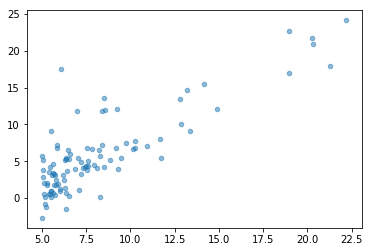

In [6]:
#gerando o gráfico de dispersão
#para analise preliminar dos dados
plt.scatter(x, y, s=20, alpha=0.5)
plt.show()

In [14]:
import pandas as pandas

def computarCusto(x, y, alpha = 0.01, convergencia = 0.01, max_iteracoes = 1000):
    convergiu = False
    iteracoes = 0

    m = x.shape[0]

    #calculando os thetas iniciais
    th0 = 0
    th1 = 0

    #calculando o erro total, J(theta)
    J = sum([(th0 + th1 * x[i] - y[i]) ** 2 for i in range(m)])

    while not convergiu:
        #atualizando o numero de iteraçoes
        iteracoes += 1
        
        # para cada exemplo de treinamento, computar o gradiente (d/d_theta_j(theta)
        grad0 = 1.0 / m * sum([(th0 + th1 * x[i] - y[i]) for i in range(m)])
        grad1 = 1.0 / m * sum([(th0 + th1 * x[i] - y[i]) * x[i] for i in range(m)])

        # atualizando os thteas temporarios theta_temp
        temp0 = th0 - alpha * grad0
        temp1 = th1 - alpha * grad1

        #atualizando os thetas
        th0 = temp0
        th1 = temp1

        # erro medio quadratico
        erro = sum([(th0 + th1 * x[i] - y[i]) ** 2 for i in range(m)])

        #verificando o criterio de convergencia
        if abs(J - erro) <= convergencia:
            print('Convergiu após', iteracoes, 'iterações !!!')
            convergiu = True

        #atualizando o erro (J)
        J = erro

        #segundo criterio de parada, maximo de iterações atingidas
        if iteracoes == max_iteracoes:
            print("Maximo de iteracoes atingidas", max_iteracoes)
            convergiu = True

    return th0,th1

In [19]:
#executando o algoritmos de regressão linear
th0, th1 = computarCusto(x, y, max_iteracoes = 10000)
print("theta0", th0, "theta1", th1)

Convergiu após 1279 iterações !!!
theta0 [-3.50021861] theta1 [ 1.15329512]


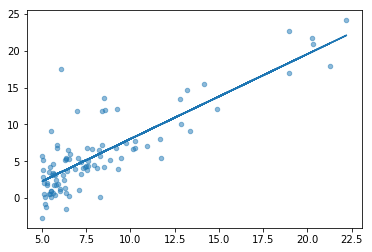

In [21]:
#tracando a linha de regressão linear sobre o gráfico
plt.scatter(x, y, s=20, alpha=0.5)
plt.plot(x, th1*x + th0, '-')
plt.show()